In [1]:
# Cell 1: Clear cache and reinstall from main branch
!pip cache purge
# Uninstall old package
!pip uninstall edge-gwas -y

# Remove any existing clone
!rm -rf ~/edge-gwas

# Clone fresh from GitHub
!cd ~ && git clone https://github.com/nicenzhou/edge-gwas.git

# Install in editable/development mode
!pip install -e ~/edge-gwas

# Verify installation
!python -c "from edge_gwas.utils import calculate_pca_plink; print('✓ Installation successful!')"

Files removed: 0
Cloning into 'edge-gwas'...
remote: Enumerating objects: 1218, done.
remote: Counting objects: 100% (436/436), done.
remote: Compressing objects: 100% (242/242), done.
remote: Total 1218 (delta 357), reused 193 (delta 193), pack-reused 782 (from 1)
Receiving objects: 100% (1218/1218), 2.61 MiB | 2.36 MiB/s, done.
Resolving deltas: 100% (774/774), done.
Obtaining file:///Users/nicen/edge-gwas
  Preparing metadata (setup.py) ... done
  Running setup.py develop for edge-gwas
✓ Installation successful!


In [2]:
# Cell 2: Install and validate the outside tools
# Install external tools (PLINK2, GCTA, R packages)
#!echo -e "yes\n3\n2" | edge-gwas-install-tools

# Verify installation
!edge-gwas-check-tools


EDGE-GWAS External Tools Check

Python Packages:
----------------------------------------------------------------------
✓ numpy: Installed
✓ pandas: Installed
✓ scipy: Installed
✓ statsmodels: Installed
✓ sklearn: Installed
✓ matplotlib: Installed
✓ pandas_plink: Installed

External Tools:
----------------------------------------------------------------------
✓ PLINK2: PLINK v2.0.0-a.7 64-bit (5 Dec 2025)
✓ GCTA: *******************************************************************

R and Packages:
----------------------------------------------------------------------
✓ R: R version 4.3.3 (2024-02-29) -- "Angel Food Cake"
✓ R package GENESIS: Installed
✓ R package SNPRelate: Installed
✓ R package gdsfmt: Installed

✓ All tools and packages are properly installed!

You can now use all EDGE-GWAS features including:
  - Basic EDGE analysis
  - PCA calculation with PLINK2
  - GRM calculation with GCTA
  - PC-AiR analysis with R/GENESIS



In [3]:
# Cell 3: Load the functions from package
from edge_gwas import *
import pandas as pd
from edge_gwas import EDGEAnalysis
from edge_gwas.utils import *
from edge_gwas.visualize import manhattan_plot, qq_plot, plot_alpha_distribution
from IPython.display import Image, display

In [4]:
# Cell 4: Download test files to default 'tests' directory
download_test_files(version='main',overwrite=True)

INFO:edge_gwas.io_handlers:Downloading test files to tests


⬇ Downloading: test.bed... 

INFO:edge_gwas.io_handlers:Downloaded test.bed from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bed
INFO:edge_gwas.io_handlers:Downloaded test.bim from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bim


✓ (0.94 MB)
⬇ Downloading: test.bim... ✓ (0.03 MB)
⬇ Downloading: test.fam... 

INFO:edge_gwas.io_handlers:Downloaded test.fam from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.fam


✓ (0.07 MB)
⬇ Downloading: test.phen... 

INFO:edge_gwas.io_handlers:Downloaded test.phen from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.phen


✓ (0.09 MB)
⬇ Downloading: test.vcf... 

INFO:edge_gwas.io_handlers:Downloaded test.vcf from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.vcf


✓ (0.23 MB)

Summary:
  ✓ Downloaded: 5
  ⊙ Skipped: 0
  ✗ Failed: 0


{'downloaded': ['test.bed', 'test.bim', 'test.fam', 'test.phen', 'test.vcf'],
 'skipped': [],
 'failed': []}

In [5]:
# Cell 5: Load data
geno, info = load_plink_data('tests/test.bed', 'tests/test.bim', 'tests/test.fam')
geno_vcf, info_vcf = load_vcf_data('tests/test.vcf')

INFO:edge_gwas.utils:Loading PLINK data from tests/test.bed
Mapping files: 100%|██████████████████████████████| 3/3 [00:00<00:00, 34.04it/s]
INFO:edge_gwas.utils:Loaded 3925 samples and 1000 variants
INFO:edge_gwas.utils:Checking and recoding to ensure minor allele is ALT...
INFO:edge_gwas.utils:Flipped 991 variants to ensure minor allele is ALT
INFO:edge_gwas.utils:Example flipped variants: ['rs4475691', 'rs28705211', 'rs9777703', 'rs3121567', 'rs3934834']
INFO:edge_gwas.utils:MAF range: 0.0228 - 0.5000
INFO:edge_gwas.utils:Loading VCF data from tests/test.vcf
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.ASN_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AMR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AFR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.EUR_AF"
[W::bcf_hrec_check] Invalid tag name: "UCSC.Alignability/Uniqueness"
INFO:edge_gwas.utils:Loaded 1 samples and 902 variants
INFO:edge_gwas.utils:Using dosages (DS field)
INFO:edge_gwas.utils:Check

In [6]:
# Cell 6: PCA on genotyped calls/raw genotyped data using sklearn, plink, PC-AiR
pca_df_sklearn = calculate_pca_sklearn(geno, n_pcs=10)
pca_df_plink = calculate_pca_plink('tests/test', n_pcs=10)
pca_df_pcair = calculate_pca_pcair('tests/test', n_pcs=10)

INFO:edge_gwas.utils:Calculating 10 principal components using scikit-learn...
INFO:edge_gwas.utils:✓ genotype_df basic validation passed: 3925 samples, 1000 variants
INFO:edge_gwas.utils:Explained variance ratio: [0.01817612 0.01467451 0.01316931 0.01167561 0.01104282]
INFO:edge_gwas.utils:Total variance explained by 10 PCs: 0.117
INFO:edge_gwas.utils:PCA complete for 3925 samples
INFO:edge_gwas.utils:Calculating 10 PCs using PLINK2 (exact method)...
INFO:edge_gwas.utils:Input format: bfile
INFO:edge_gwas.utils:MAF threshold: 0.01
INFO:edge_gwas.utils:LD pruning: window=50, step=5, r²<0.2
INFO:edge_gwas.utils:Step 1: LD pruning...
INFO:edge_gwas.utils:Step 2: Calculating PCA...
INFO:edge_gwas.utils:Variance explained by first 5 PCs: [0.11810096 0.10897235 0.10476602 0.10282947 0.09930652]
INFO:edge_gwas.utils:Total variance explained: 1.000
INFO:edge_gwas.utils:PCA complete. Found 3925 samples.
INFO:edge_gwas.utils:Calculating 10 PCs using PC-AiR...
INFO:edge_gwas.utils:Calculating ki

In [7]:
# Cell 7: GRM calculation use GCTA
grm = calculate_grm_gcta('tests/test')

INFO:edge_gwas.utils:Calculating GRM using GCTA (method: grm)...
INFO:edge_gwas.utils:MAF threshold: 0.01, Threads: 1
INFO:edge_gwas.utils:GRM calculation complete. Output: /var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/tmpmxlgiz5l/grm.grm.*


In [8]:
# Cell 8: Prepare phenotype (adjust column names as needed)
# First, check what columns are in test.pheno
pheno_raw = pd.read_csv('tests/test.phen', sep='\t')

# Then prepare phenotype with correct column names
pheno = prepare_phenotype_data(
    'tests/test.phen', 
    outcome_col='disease',
    covariate_cols=[],  # Empty list - no covariates
    sep=' '
)

INFO:edge_gwas.utils:Loading phenotype data from tests/test.phen
INFO:edge_gwas.utils:Loaded 3925 samples with columns: ['IID', 'disease']
INFO:edge_gwas.utils:✓ phenotype_df validation passed
INFO:edge_gwas.utils:✓ Prepared phenotype data for 3925 samples


In [9]:
# Cell 9: Add the calculated PCs to pheno table
#pheno_sklearn = attach_pcs_to_phenotype(pheno, pca_df_sklearn, n_pcs=10)
#pheno_plink = attach_pcs_to_phenotype(pheno, pca_df_plink, n_pcs=10)
pheno_pcair = attach_pcs_to_phenotype(pheno, pca_df_pcair, n_pcs=10)

INFO:edge_gwas.utils:Attaching 10 PCs to phenotype data
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:PCA samples: 3925
INFO:edge_gwas.utils:Samples with PCs after merge: 3925


In [10]:
# Cell 10: All possible QC filtering
pheno = pheno_pcair
geno_filtered, pheno_filtered = filter_genotype_data(
    geno, 
    pheno,
    min_maf=0.01, 
    max_missing_per_variant=0.1,
    min_call_rate_per_sample=0.95
)

#geno = filter_variants_by_maf(geno, min_maf=0.01)
#geno = filter_variants_by_missing(geno, max_missing=0.01)
#geno, pheno = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.05)
#hwe = calculate_hwe_pvalues(geno)
#geno = filter_variants_by_hwe(geno, hwe_threshold=1e-6)

#geno_vcf = filter_variants_by_maf(geno_vcf, min_maf=0.01)
#geno_vcf = filter_variants_by_missing(geno_vcf, max_missing=0.01)
#geno_vcf = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.95)

INFO:edge_gwas.utils:======================================================================
INFO:edge_gwas.utils:Starting genotype QC filtering
INFO:edge_gwas.utils:======================================================================
INFO:edge_gwas.utils:Input: 3925 samples x 1000 variants
INFO:edge_gwas.utils:
[1/3] Filtering variants by MAF >= 0.01
INFO:edge_gwas.utils:Filtered variants by MAF >= 0.01
INFO:edge_gwas.utils:Kept 1000/1000 variants (100.0%)
INFO:edge_gwas.utils:MAF range in filtered data: 0.0228 - 0.5000
INFO:edge_gwas.utils:
[2/3] Filtering variants by missing rate <= 0.1
INFO:edge_gwas.utils:Filtered variants by missing rate <= 0.1
INFO:edge_gwas.utils:Kept 918/1000 variants (91.8%)
INFO:edge_gwas.utils:Missing rate range in filtered data: 0.0000 - 0.0991
INFO:edge_gwas.utils:
[3/3] Filtering samples by call rate >= 0.95
INFO:edge_gwas.utils:Filtered samples by call rate >= 0.95
INFO:edge_gwas.utils:Genotype samples: kept 3915/3925 (99.7%)
INFO:edge_gwas.utils:Pheno

            step criterion  before  after  removed
      MAF filter   >= 0.01    1000   1000        0
 Variant missing    <= 0.1    1000    918       82
Sample call rate   >= 0.95    3925   3915       10



In [11]:
# Cell 10: Validate the geno, pheno, and both with alignment (remove individuals who are only in geno or pheno)
#validate_genotype_df(geno_filtered)
#validate_phenotype_df(pheno_filtered, outcome_col='disease', covariate_cols=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))
geno_fixed, info_fixed, final_report = validate_and_fix_encoding(geno_filtered, info)
geno, pheno = validate_and_align_data(geno_fixed, pheno_filtered)

final_report

INFO:edge_gwas.utils:✓ genotype_df basic validation passed: 3915 samples, 918 variants
INFO:edge_gwas.utils:Checking encoding (minor allele as ALT)...
INFO:edge_gwas.utils:Encoding validation: PASS=918, FAIL=0, WARNING=0
INFO:edge_gwas.utils:Overall: ✓ PASSED
INFO:edge_gwas.utils:MAF range: 0.0228 - 0.5000
INFO:edge_gwas.utils:✓ No fixes needed
INFO:edge_gwas.utils:Validating and aligning genotype and phenotype data...
INFO:edge_gwas.utils:Sample overlap:
INFO:edge_gwas.utils:  Genotype samples: 3915
INFO:edge_gwas.utils:  Phenotype samples: 3915
INFO:edge_gwas.utils:  Common samples: 3915
INFO:edge_gwas.utils:✓ Data validated and aligned: 3915 samples
INFO:edge_gwas.utils:  Genotype shape: (3915, 918)
INFO:edge_gwas.utils:  Genotype index: 'sample_id'
INFO:edge_gwas.utils:  Phenotype shape: (3915, 11)
INFO:edge_gwas.utils:  Phenotype index: 'sample_id'


,variant_id,n_valid,alt_freq,maf,minor_is_alt,status,issue,was_fixed
0,rs3934834,3885,0.143115,0.143115,True,PASS,None,False
1,rs3737728,3915,0.289272,0.289272,True,PASS,None,False
2,rs6687776,3914,0.156873,0.156873,True,PASS,None,False
3,rs9651273,3913,0.274981,0.274981,True,PASS,None,False
4,rs4970405,3912,0.101866,0.101866,True,PASS,None,False
...,...,...,...,...,...,...,...,...
913,rs6679380,3915,0.268072,0.268072,True,PASS,None,False
914,rs7418365,3912,0.356595,0.356595,True,PASS,None,False
915,rs10157778,3911,0.381105,0.381105,True,PASS,None,False
916,rs12040542,3910,0.118542,0.118542,True,PASS,None,False


In [12]:
# Cell 11: Split data for alpha calculation and alpha applying sets
from edge_gwas.utils import stratified_train_test_split
train_g, test_g, train_p, test_p = stratified_train_test_split(
    geno, pheno, 'disease', 
    test_size=0.3, 
    random_state=42,
    geno_id_col='sample_id',
    pheno_id_col='sample_id',
    is_binary=False
)

INFO:edge_gwas.utils:Splitting data into train/test (70%/30%)
INFO:edge_gwas.utils:Found 3915 common samples (dropped 0 from genotype, 0 from phenotype)
INFO:edge_gwas.utils:Training set: 2740 samples
INFO:edge_gwas.utils:Test set: 1175 samples


In [13]:
# Cell 12: Run EDGE analysis using full function
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'),
    variant_info = info,
    mean_centered = True #??? NEED TO ASK MOLLY IF WE WANT TO DO THIS IN THE ALPHA CALCULATION
)

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:Using mean-centered codominant model (no intercept)
INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Using mean-centered codominant model (no intercept)
INFO:edge_gwas.core:Processing variant 100/918
INFO:edge_gwas.core:Processing variant 200/918
INFO:edge_gwas.core:Processing variant 300/918
INFO:edge_gwas.core:Processing variant 400/918
INFO:edge_gwas.core:Processing variant 500/918
INFO:edge_gwas.core:Processing variant 600/918
INFO:edge_gwas.core:Processing variant 700/918
INFO:edge_gwas.core:Processing variant 800/918
INFO:edge_gwas.core:Processing variant 900/918
INFO:edge_gwas.core:Alpha calculation complete. Processed 918 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:Mean-centered codominant model was used (no intercept)
I

In [14]:
# Cell 13: Run EDGE analysis using two steps
#edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
#alpha_df_inv = edge.calculate_alpha(train_g, train_p, variant_info = info, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'), mean_centered = True)
#gwas_df_inv = edge.apply_alpha(test_g, test_p, variant_info = info, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))

In [15]:
# Cell 14: Add fake chr and pos to the gwas results for testing the fucntions for plotting 

# Human genome chromosome lengths (GRCh38/hg38) in base pairs
chr_lengths = {
    1: 248956422,
    2: 242193529,
    3: 198295559,
    4: 190214555,
    5: 181538259,
    6: 170805979,
    7: 159345973,
    8: 145138636,
    9: 138394717,
    10: 133797422,
    11: 135086622,
    12: 133275309,
    13: 114364328,
    14: 107043718,
    15: 101991189,
    16: 90338345,
    17: 83257441,
    18: 80373285,
    19: 58617616,
    20: 64444167,
    21: 46709983,
    22: 50818468
}

# Calculate total genome length
total_length = sum(chr_lengths.values())

# Calculate probability for each chromosome based on its length
chr_probs = []
chr_nums = []
for chr_num in range(1, 23):
    chr_nums.append(chr_num)
    chr_probs.append(chr_lengths[chr_num] / total_length)

# Calculate cumulative probabilities for chromosome assignment
cumsum_probs = []
running_sum = 0
for prob in chr_probs:
    running_sum += prob
    cumsum_probs.append(running_sum)

# Add chr and pos columns to alpha_df
import numpy as np

# Add chr and pos columns to gwas_df
n_variants_gwas = len(gwas_df)

chr_assignments_gwas = []
pos_assignments_gwas = []

np.random.seed(43)  # Different seed for test data
random_values_gwas = np.random.random(n_variants_gwas)

for rand_val in random_values_gwas:
    # Find which chromosome this random value falls into
    assigned_chr = 22  # default to last chr
    for i in range(len(cumsum_probs)):
        if rand_val < cumsum_probs[i]:
            assigned_chr = chr_nums[i]
            break
    
    chr_assignments_gwas.append(assigned_chr)
    
    # Assign random position within that chromosome
    max_pos = chr_lengths[assigned_chr]
    pos = np.random.randint(1, max_pos + 1)
    pos_assignments_gwas.append(pos)

# Add to dataframe
gwas_df['chr'] = chr_assignments_gwas
gwas_df['pos'] = pos_assignments_gwas

# Sort by chr then pos
gwas_df = gwas_df.sort_values(['chr', 'pos']).reset_index(drop=True)

print(f"\nAdded chr and pos columns to {len(gwas_df)} GWAS variants")
print(f"\nChromosome distribution in GWAS results:")
for chr_num in range(1, 23):
    count = sum(1 for c in chr_assignments_gwas if c == chr_num)
    print(f"  Chr {chr_num}: {count} variants")

# Display first few rows to verify
print(f"\nFirst few rows of gwas_df with chr/pos:")
print(gwas_df.head(10))


Added chr and pos columns to 918 GWAS variants

Chromosome distribution in GWAS results:
  Chr 1: 78 variants
  Chr 2: 77 variants
  Chr 3: 55 variants
  Chr 4: 56 variants
  Chr 5: 56 variants
  Chr 6: 53 variants
  Chr 7: 50 variants
  Chr 8: 43 variants
  Chr 9: 53 variants
  Chr 10: 42 variants
  Chr 11: 43 variants
  Chr 12: 45 variants
  Chr 13: 31 variants
  Chr 14: 34 variants
  Chr 15: 38 variants
  Chr 16: 27 variants
  Chr 17: 26 variants
  Chr 18: 32 variants
  Chr 19: 15 variants
  Chr 20: 26 variants
  Chr 21: 16 variants
  Chr 22: 22 variants

First few rows of gwas_df with chr/pos:
   variant_id         snp  alpha_value      coef   std_err      stat  \
0    rs242052    rs242052    -0.589834 -0.165771  0.077663 -2.134493   
1    rs950601    rs950601    -0.434689 -0.075307  0.068533 -1.098841   
2   rs2651929   rs2651929    -1.892338 -0.036256  0.026378 -1.374456   
3   rs7521197   rs7521197    -0.320352 -0.436127  0.240919 -1.810264   
4   rs2493215   rs2493215     0.16

Note: 60 alpha values outside range [-3, 3] excluded from plot
Alpha distribution plot saved to alpha.png
Total alpha values: 918
Values plotted (within [-3, 3]): 858
Alpha statistics:
  Mean: 0.399
  Median: -0.025
  Std: 12.795
  Min: -97.780
  Max: 244.898


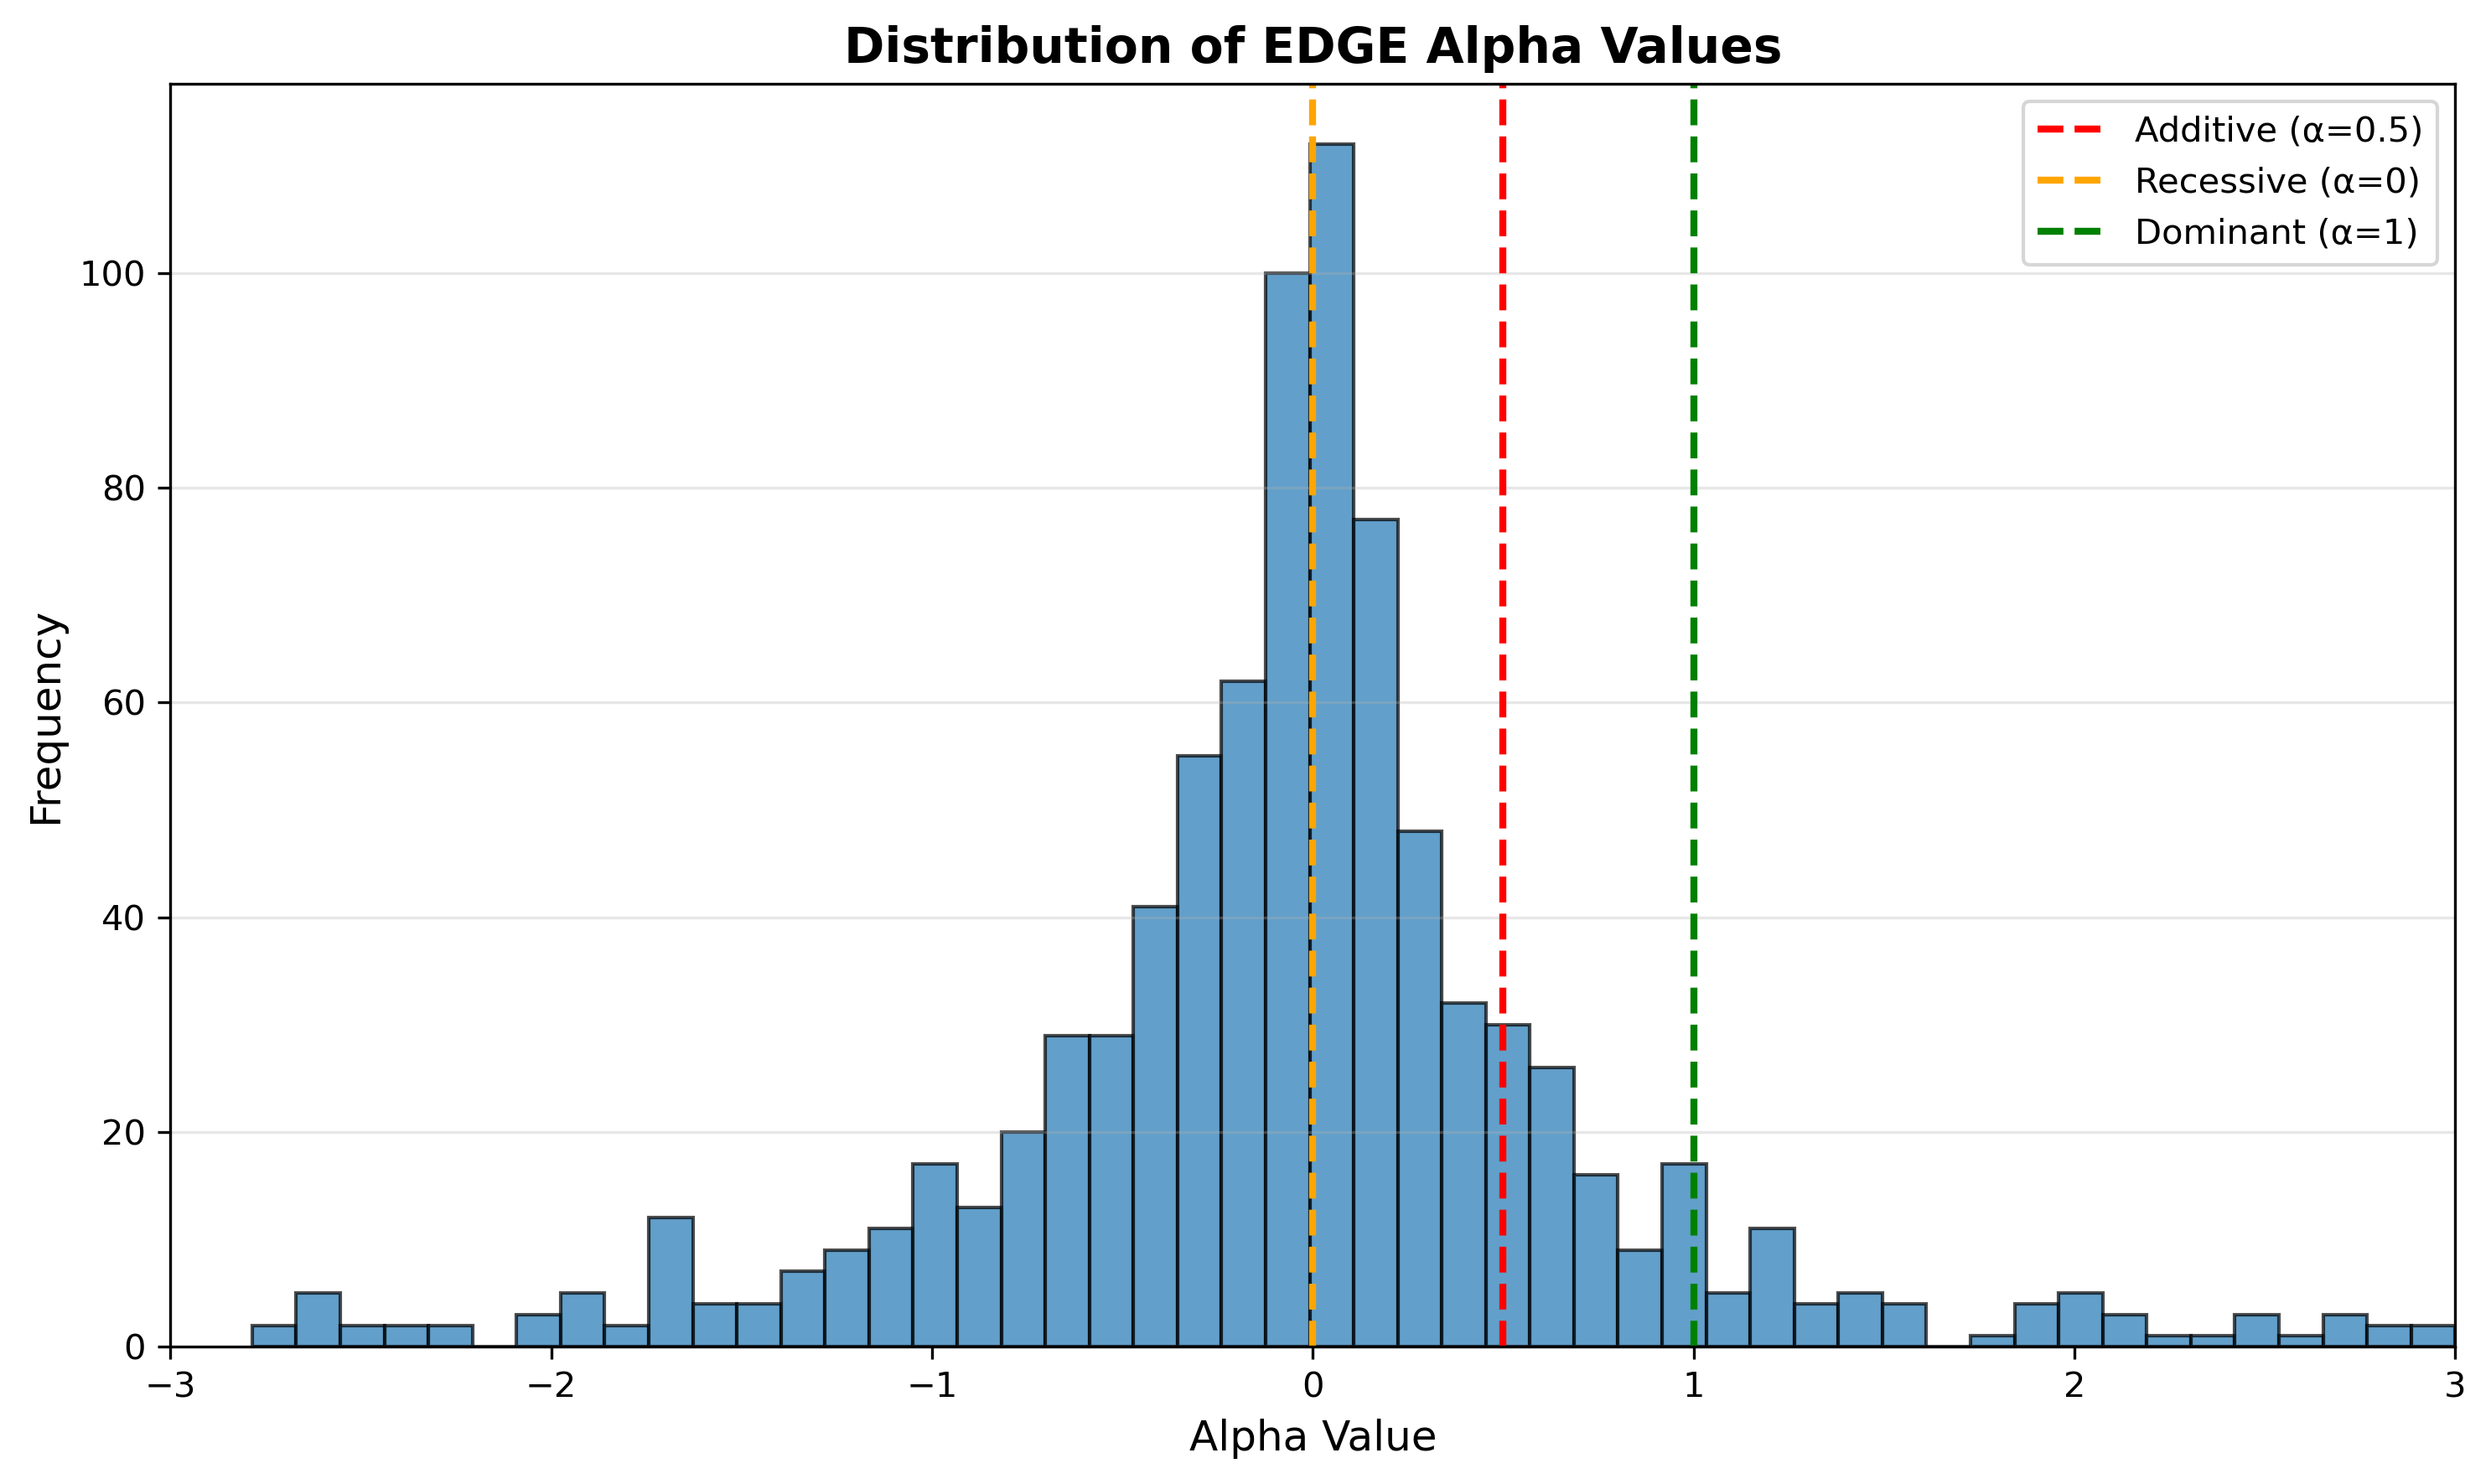

Manhattan plot saved to manhattan.png


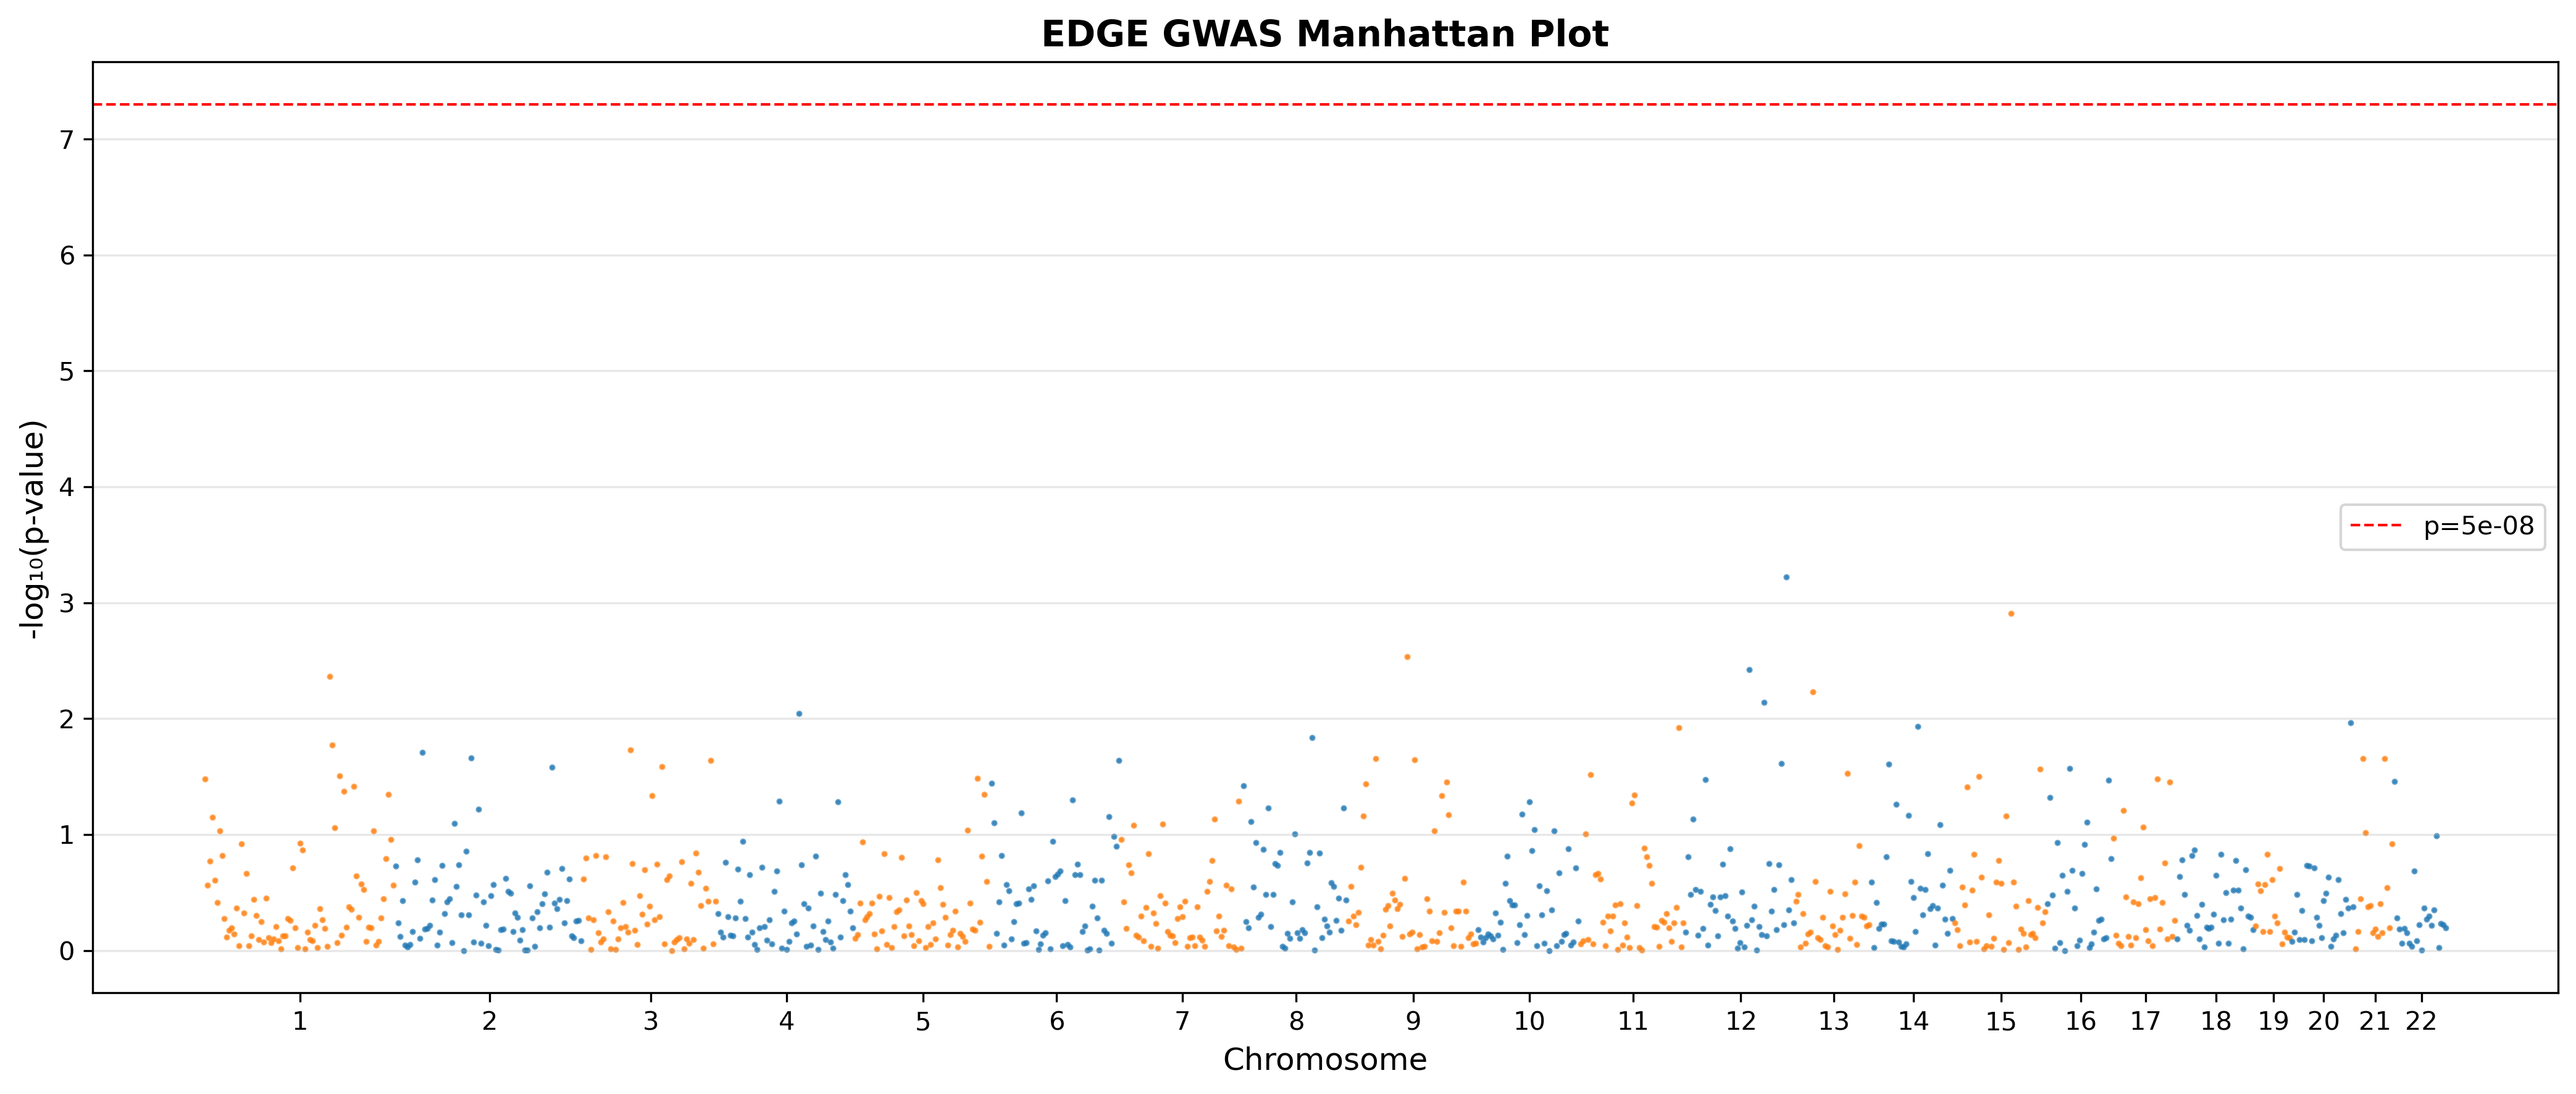

QQ plot saved to qq.png
Genomic inflation factor (λ): 0.907
Lambda GC: 0.907


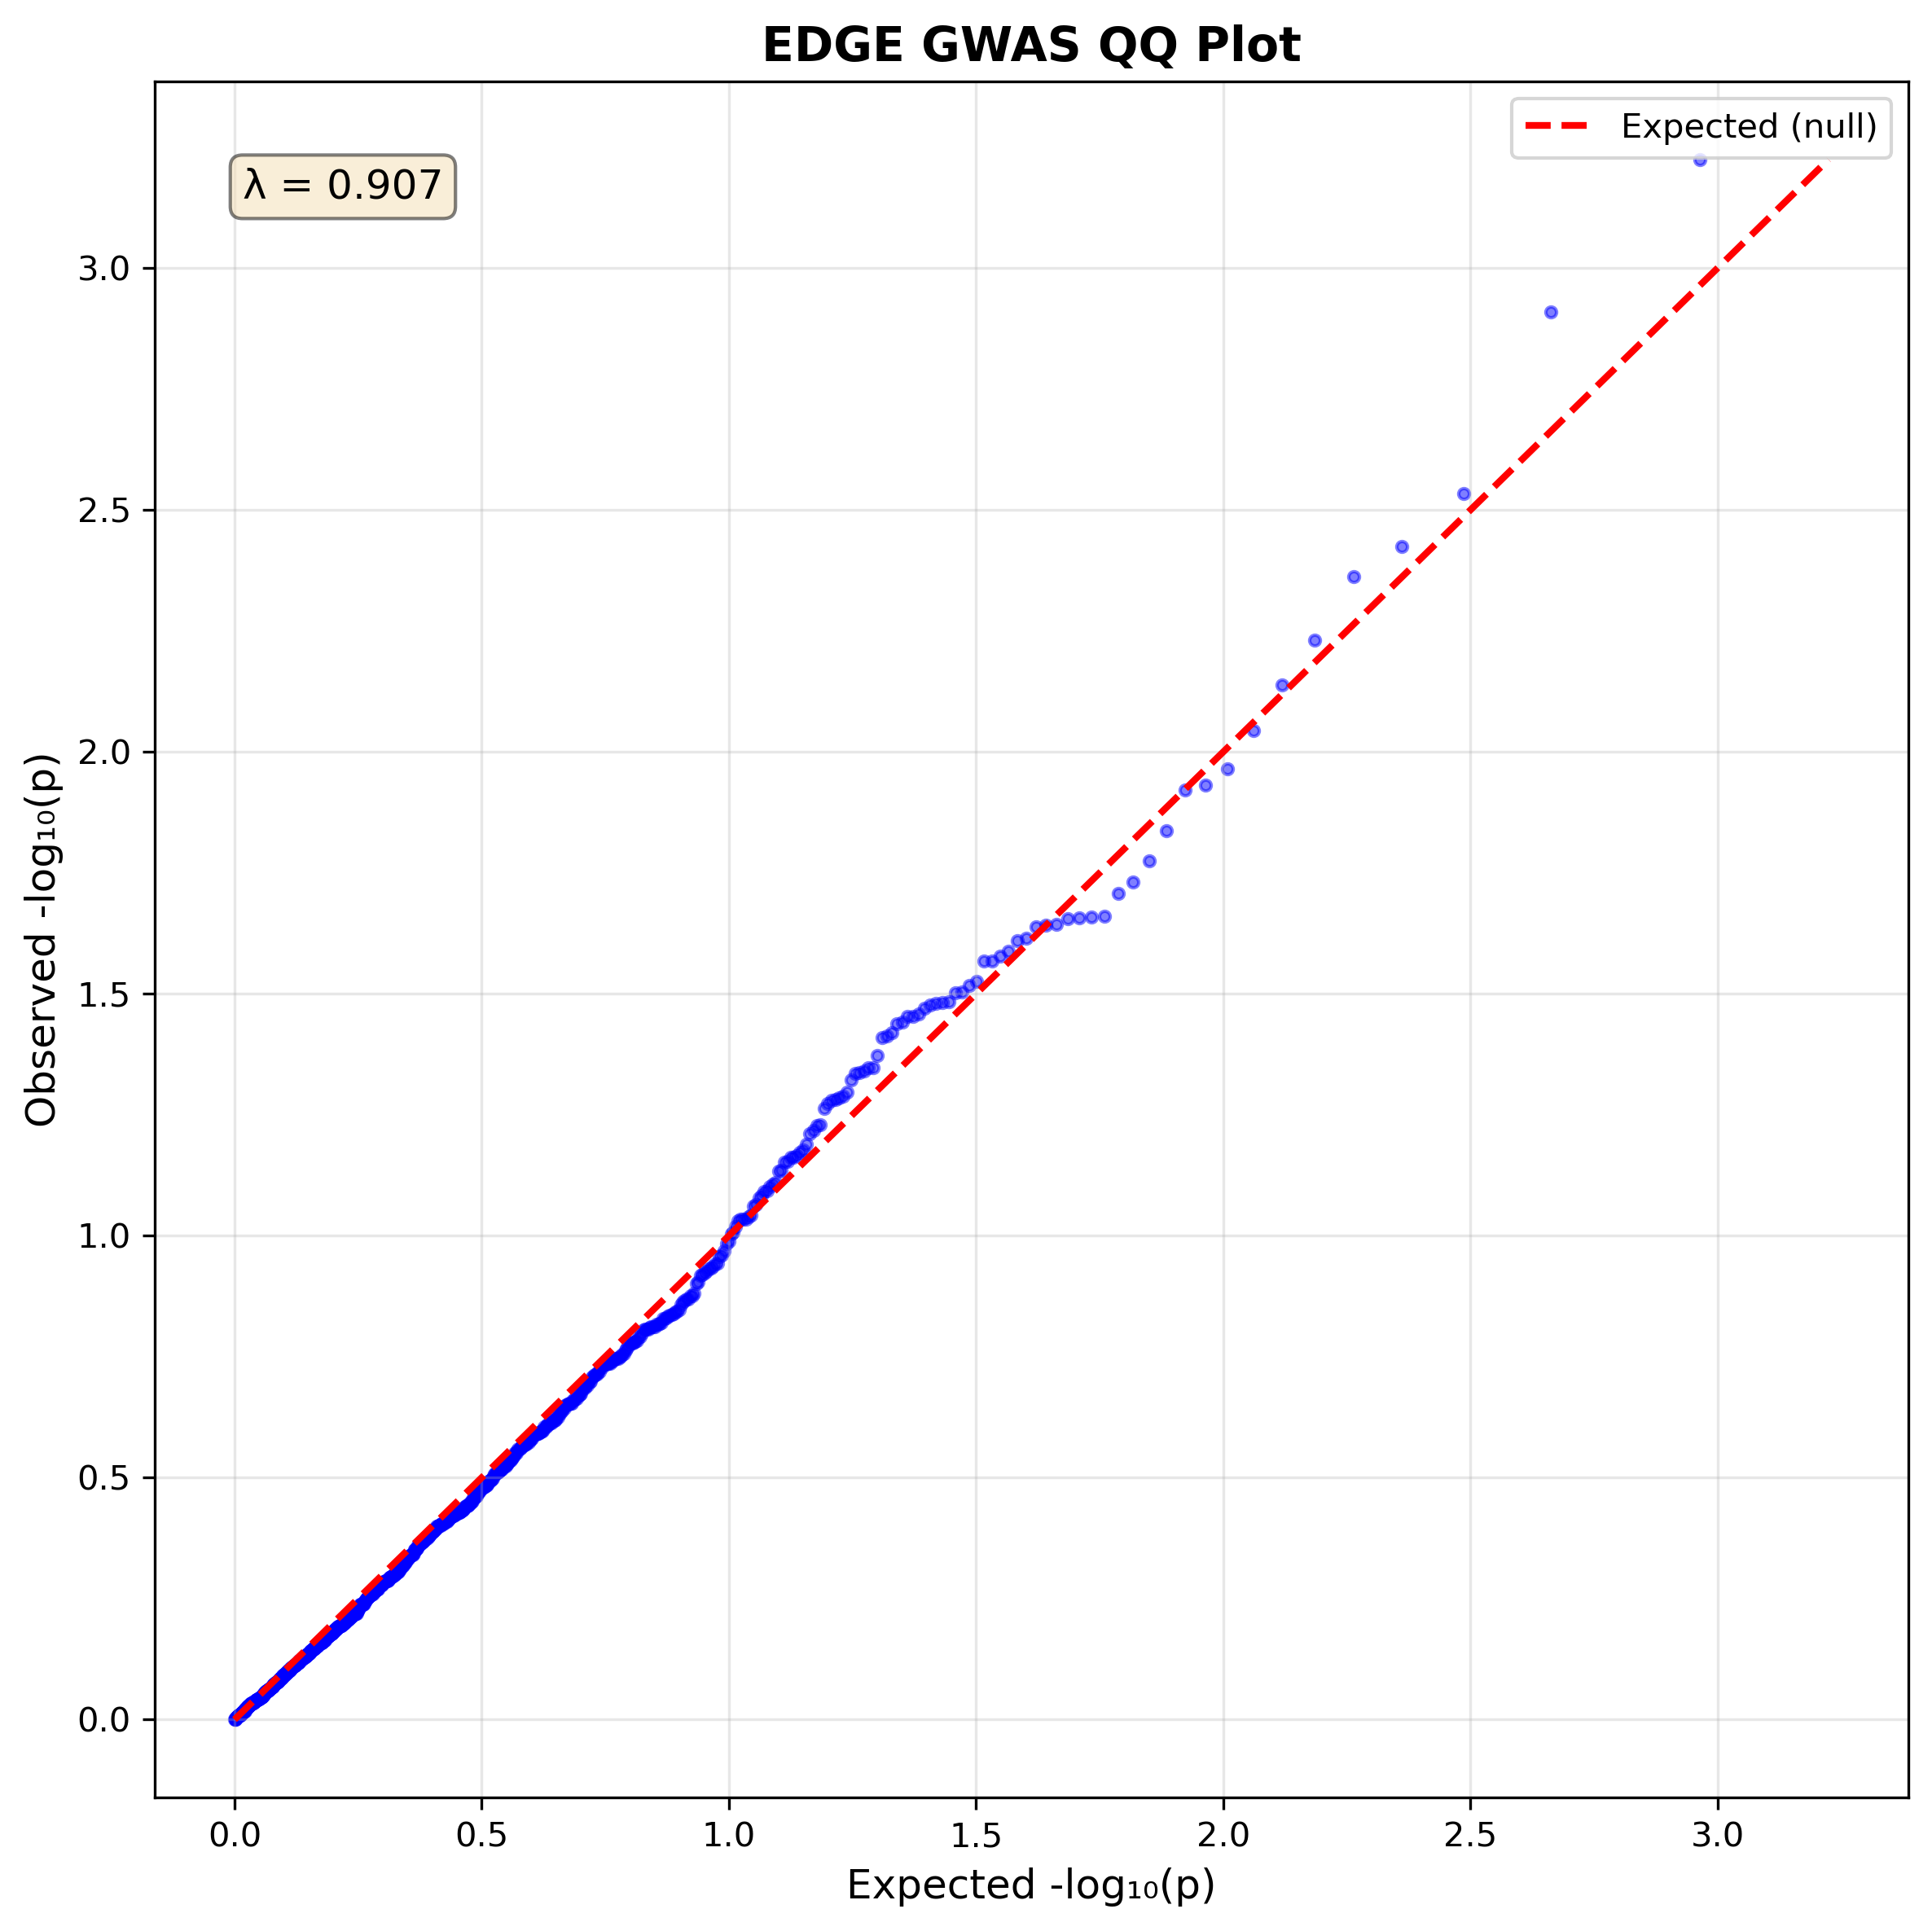

In [16]:
# Cell 15: Visualize with alpha distribution, gwas results in manhattan plot, and genetic inflation in qq plot
alpha_distribution = plot_alpha_distribution(alpha_df, 'alpha.png', xlim=(-3,3))
display(Image('alpha.png'))

manhattan_plot(gwas_df, 'manhattan.png')
display(Image('manhattan.png'))

lambda_gc = qq_plot(gwas_df, 'qq.png')
print(f"Lambda GC: {lambda_gc:.3f}")
display(Image('qq.png'))